<a id='top'></a>
# Log completion by ML regression

- Typical and useful Pandas
    - Data exploration using Matplotlib
    - Basic steps for data cleaning
    - **Exercise: Find problem in specific well log data.**
    - Feature engineering
- Setup scikit-learn workflow
    - Making X and y
- Choosing a model
    - Classification vs Regression
- Evaluating model performance
    - Parameter selection and tuning
    - GridSearch
- Add more data / remove data 

## More Pandas
---

Load Numpy, Pandas and Matplotlib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

% matplotlib inline

Define the name of the file to be loaded and use Pandas to read it. Note that the name can be a PATH pointing at the file.

In [2]:
datafile = '../data/training_DataFrame.csv'

Pandas expects by default a column on the file to be an index for each row of values. For this example, column 1 (index = 0) is that column.

In [3]:
wells = pd.read_csv(datafile, index_col=0)

# Data Exploration and cleaning

Before feeding our machines with data to learn from, it's important to make sure that we feed them the best possible data. Pandas has a few methods to explore the contents of the data. The `head()` method shows the top rows of the DataFrame.

In [4]:
wells.head()

,well_ID,Depth,GR,ILD,NPHI,DPHI,RHOB
0,0.0,140.0,102.0230,2.9910,0.5520,0.246,0.0
1,0.0,140.1,100.8074,3.0134,0.5596,0.258,0.0
2,0.0,140.2,99.5918,3.0358,0.5672,0.270,0.0
3,0.0,140.3,98.8622,3.0470,0.5686,0.274,0.0
4,0.0,140.4,98.6186,3.0470,0.5638,0.270,0.0


Another useful Pandas method is `describe()`, which compile useful statistics of each numeric column in the `DataFrame`. 

In [5]:
wells.describe()

,well_ID,Depth,GR,ILD,NPHI,DPHI,RHOB
count,164041.000000,164041.000000,162842.000000,163558.000000,162830.000000,163078.000000,162768.000000
mean,35.084095,281.776399,75.893516,36.998366,0.421645,0.262834,958.301220
std,21.494848,114.089130,25.934663,891.198299,0.086738,0.088723,1120.852391
min,0.000000,0.000000,0.000000,-0.496000,-0.002000,-0.239000,-245.448000
25%,17.000000,201.500000,57.308050,5.045000,0.379800,0.227800,0.000000
50%,34.000000,289.300000,78.559000,8.367000,0.428200,0.267800,0.000000
75%,52.000000,363.100000,95.130000,16.407200,0.473800,0.309400,2226.820000
max,74.000000,615.000000,290.759000,100000.000000,0.722200,1.606000,3043.610000


Note how the `count` row is not the same for all columns? This means that there are some values that Pandas doesn't think they are numbers! (Could be missing values or `NaN`s). There are many strategies to deal with missing data but for this excercise we're just going to ignore the rows that contain these bad values.

In [6]:
wells = wells.dropna()

In [7]:
wells.describe()

,well_ID,Depth,GR,ILD,NPHI,DPHI,RHOB
count,162353.000000,162353.000000,162353.000000,162353.00000,162353.000000,162353.000000,162353.000000
mean,34.837558,283.862341,76.008393,36.33629,0.422174,0.263171,954.130772
std,21.461413,112.579670,25.875123,893.74899,0.086146,0.088163,1119.205970
min,0.000000,0.000000,0.000000,-0.49600,-0.002000,-0.239000,-245.448000
25%,16.000000,204.900000,57.480800,5.03960,0.380000,0.228000,0.000000
50%,34.000000,290.700000,78.667800,8.34660,0.428400,0.268000,0.000000
75%,52.000000,364.000000,95.174000,16.34400,0.474000,0.309400,2225.626000
max,74.000000,614.900000,290.759000,100000.00000,0.722200,1.606000,3043.610000


Now every column in the `DataFrame` should contain the same number of elements and now we can focus on the statistics themselves. Look at each log property, do those `mean`, `min` and `max` look OK? `ILD` shouldn't have negative values. Let's take them out of our set:

In [8]:
wells = wells[wells.ILD > 0]

In [9]:
wells.describe()

,well_ID,Depth,GR,ILD,NPHI,DPHI,RHOB
count,161876.000000,161876.000000,161876.000000,1.618760e+05,161876.000000,161876.000000,161876.000000
mean,34.765104,284.665205,76.130415,3.644336e+01,0.422487,0.261927,952.466714
std,21.450405,111.762860,25.791143,8.950627e+02,0.084811,0.073632,1118.187338
min,0.000000,0.000000,0.000000,4.320100e-09,-0.002000,-0.239000,-245.448000
25%,16.000000,206.000000,57.645000,5.071400e+00,0.380200,0.228000,0.000000
50%,34.000000,291.100000,78.787000,8.379000e+00,0.428400,0.268000,0.000000
75%,52.000000,364.235500,95.220150,1.636623e+01,0.473800,0.309200,2225.187500
max,74.000000,614.900000,290.759000,1.000000e+05,0.722200,1.316400,3043.610000


Another typical first approach to explore the data is to study the distribution of values in the dataset...

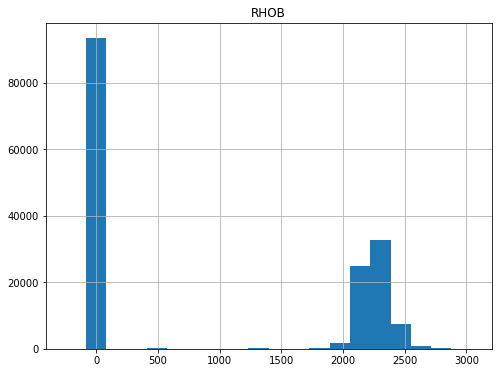

In [10]:
ax = wells.hist(column="RHOB", figsize=(8,6), bins=20)

<div class="alert alert-success">
    <b>Exercise</b>:
     <ul>
      <li>
      That distribution doesn't seem right. Can you exclude the `DataFrame` values for which `RHOB` is higher than `1800`?
      </li>
      <p>
    </ul>
</div>

In [11]:
# Put your code here
#!--
wells = wells[wells.RHOB > 1800]
#--!

<div class="alert alert-success">
    <b>Exercise</b>:
     <ul>
      <li>
      Explore the rest of the `DataFrame`. Do all distributions look OK?
      </li>
      <p>
    </ul>
</div>

Seaborn has a few tricks to display histograms better

In [12]:
import seaborn as sns

In [13]:
wells.ILD.values

array([4.011 , 4.3386, 4.6662, ..., 5.3338, 5.5834, 5.833 ])

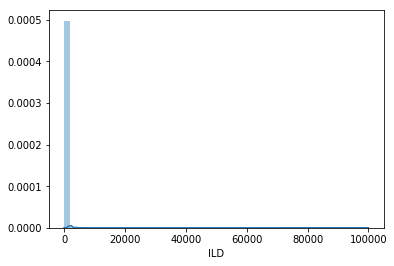

In [14]:
sns.distplot(wells['ILD'])

<div class="alert alert-success">
    <b>Exercise</b>:
     <ul>
      <li>
      Calculate the `log` of ILD and store it in the `DataFrame`
      </li>
      <p>
    </ul>
</div>

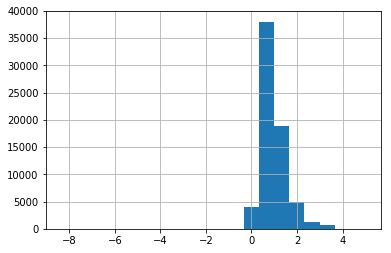

In [15]:
# Put your code here
#!--
wells['log_ILD'] = np.log10(wells['ILD'])
axs = wells['log_ILD'].hist(bins=20)
#--!

In [16]:
wells = wells[wells.DPHI > 0]

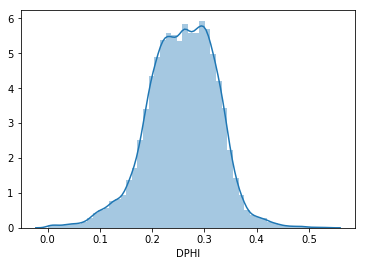

In [17]:
sns.distplot(wells.DPHI)

# Load testing data

In [18]:
w_train = wells.copy()
w_test = pd.read_csv('../data/testing_DataFrame.csv', index_col=0)
w_test_complete = pd.read_csv('../data/testing_DataFrame_complete.csv', index_col=0)

In [19]:
w_test.head()

,well_ID,Depth,GR,ILD,NPHI,DPHI
165551,75.0,306.0,111.7490,5.2770,0.4360,0.2640
165552,75.0,306.1,109.0258,5.4846,0.4408,0.2676
165553,75.0,306.2,106.3026,5.6922,0.4456,0.2712
165554,75.0,306.3,103.7030,5.9586,0.4458,0.2748
165555,75.0,306.4,101.2270,6.2838,0.4414,0.2784


In [20]:
w_test.describe()

,well_ID,Depth,GR,ILD,NPHI,DPHI
count,8651.000000,8651.000000,8651.000000,8651.000000,8651.000000,8651.000000
mean,78.157207,109.707514,72.701024,172.540329,0.426073,0.248199
std,2.183443,80.292603,28.011763,2058.189240,0.082984,0.086834
min,75.000000,0.000000,7.729000,0.366200,0.060000,-0.217000
25%,76.000000,51.800000,52.079600,6.858950,0.380800,0.210275
50%,78.000000,90.400000,73.708000,22.316700,0.421600,0.256800
75%,80.000000,148.200000,96.285000,74.444000,0.477600,0.306600
max,83.000000,366.500000,212.895000,99960.828100,0.932800,0.454000


In [21]:
w_test = w_test[w_test.DPHI > 0]

In [22]:
w_test_complete = w_test_complete[w_test_complete.DPHI > 0]

In [23]:
w_test.describe()

,well_ID,Depth,GR,ILD,NPHI,DPHI
count,8537.000000,8537.000000,8537.000000,8537.000000,8537.000000,8.537000e+03
mean,78.130257,110.791906,73.328576,174.769181,0.426032,2.527962e-01
std,2.181844,80.088485,27.609604,2071.795907,0.080438,7.734912e-02
min,75.000000,8.700000,8.133400,0.372800,0.105000,9.464429e-14
25%,76.000000,52.700000,53.027400,7.044200,0.380800,2.125000e-01
50%,78.000000,91.100000,74.169000,22.854100,0.421200,2.581000e-01
75%,80.000000,149.000000,96.487500,75.132900,0.476600,3.076000e-01
max,83.000000,366.500000,212.895000,99960.828100,0.738000,4.540000e-01


Let's start testing our training pipeline with a subset of wells. We can come back to this and change the number of wells we include, to see how it affects the result.

In [24]:
w_train = w_train[w_train.well_ID < 25]

In [25]:
# Make X and y
X = w_train[['Depth','GR','ILD','NPHI']].as_matrix()
y = w_train['RHOB'].values

In [26]:
X.shape

(22953, 4)

Set up the testing matrix of features we want to use to predict the missing `RHOB`

In [27]:
X_test = w_test[['Depth','GR','ILD','NPHI']].as_matrix()

We will display the predicted vs. true results for a test well

In [28]:
well_id = 81

# Available scikit-learn models to choose from:

http://scikit-learn.org/stable/supervised_learning.html

# Linear Regression


A first simple approach is to apply a linear model

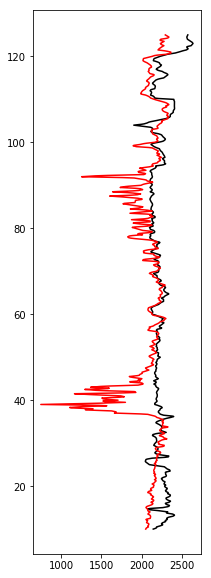

In [29]:
from sklearn import linear_model                

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X,y)

# Make predictions using the testing set
y_test_LR = regr.predict(X_test)

# add a new column to data frame that already exists
w_test_complete['RHOB_pred_LinReg'] = y_test_LR

my_well = w_test_complete[w_test_complete.well_ID==well_id]

plt.figure(figsize=(3,10))
plt.plot(my_well.RHOB, my_well.Depth, 'k')
plt.plot(my_well.RHOB_pred_LinReg, my_well.Depth,'r')

<div class="alert alert-success">
    <b>Exercise</b>:
     <ul>
      <li>
      Complete the following code to test the different classifiers similar to the Linear Regression case
      </li>
      <p>
    </ul>
</div>


# Decision Tree Regressor

In [30]:
from sklearn import tree
clf = tree.DecisionTreeRegressor()

#--!
clf = clf.fit(X, y)

y_test_DTR = clf.predict(X_test)
#--!

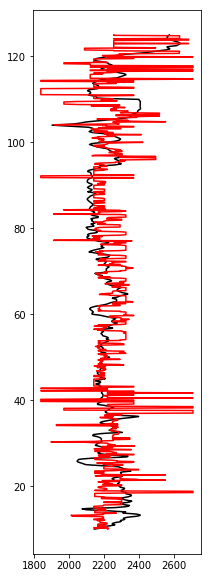

In [31]:
# add a new column to data frame that already exists and plot the results
#!--
w_test_complete['RHOB_pred_DTR'] = y_test_DTR
w_test_complete.head()


my_well = w_test_complete[w_test_complete.well_ID==well_id]

plt.figure(figsize=(3,10))
plt.plot(my_well.RHOB, my_well.Depth, 'k')
plt.plot(my_well.RHOB_pred_DTR, my_well.Depth,'r')
#--!

# Nearest Neighbours

In [32]:
from sklearn.neighbors import KNeighborsRegressor

nbrs = KNeighborsRegressor()
#!--
nbrs.fit(X, y)
y_test_KNN = nbrs.predict(X_test)
#--!

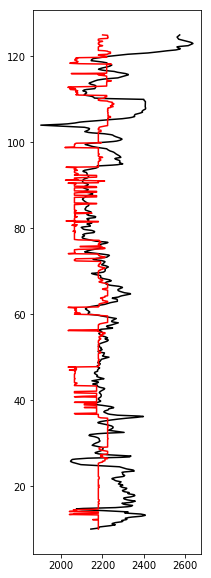

In [33]:
# add a new column to data frame that already exists and plot the results
#!--
w_test_complete['RHOB_pred_KNN'] = y_test_KNN

my_well = w_test_complete[w_test_complete.well_ID==well_id]

plt.figure(figsize=(3,10))
plt.plot(my_well.RHOB, my_well.Depth, 'k')
plt.plot(my_well.RHOB_pred_KNN, my_well.Depth,'r')
#--!

# Gradient Boosting Ensemble Regressor

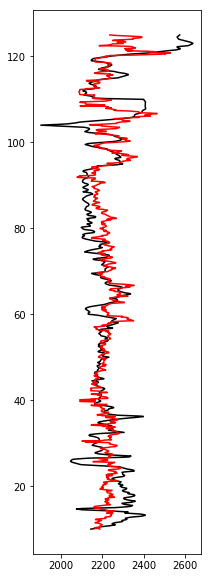

In [34]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

#!--
est = GradientBoostingRegressor(n_estimators=100, learning_rate=0.05,
    max_depth=5, random_state=0, loss='ls')

est.fit(X, y)

y_test_GBT = est.predict(X_test)
w_test_complete['RHOB_pred_GBT'] = y_test_GBT

my_well = w_test_complete[w_test_complete.well_ID==well_id]

plt.figure(figsize=(3,10))
plt.plot(my_well.RHOB, my_well.Depth, 'k')
plt.plot(my_well.RHOB_pred_GBT, my_well.Depth,'r')
#--!

# Evaluation Metrics

Although it's good to see how the plots look, a more generalized way to determine how good a model is at predicting data


http://scikit-learn.org/stable/model_selection.html#model-selection

"Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called overfitting. To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set X_test, y_test. Note that the word “experiment” is not intended to denote academic use only, because even in commercial settings machine learning usually starts out experimentally."

In [35]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(est, X_test, w_test_complete.RHOB, cv=5, scoring='neg_mean_squared_error')
scores  

array([-48788.32471017,  -9932.79745046,  -9889.01357345, -14445.05194102,
        -8155.20504912])

## Regression metrics

[TOP](#top)

http://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

In [36]:
from sklearn.metrics import explained_variance_score
print(explained_variance_score(my_well.RHOB, my_well.RHOB_pred_LinReg))  
print(explained_variance_score(my_well.RHOB, my_well.RHOB_pred_DTR))
print(explained_variance_score(my_well.RHOB, my_well.RHOB_pred_KNN))


-2.22316763092918
-1.1037780696028485
0.157931323838845


In [37]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(my_well.RHOB, my_well.RHOB_pred_LinReg))  
print(mean_squared_error(my_well.RHOB, my_well.RHOB_pred_DTR))
print(mean_squared_error(my_well.RHOB, my_well.RHOB_pred_KNN))

52029.85435914759
22815.466421389483
12719.967630416686


# Feature Engineering

What can we do to help our classifier?

<div class="alert alert-success">
    <b>Exercise</b>:
     <ul>
      <li>
      Create a function using `np.convolve` to smooth a log curve and return the smoothed version to add to the `DataFrame`
      </li>
      <p>
    </ul>
</div>

In [38]:
#!--
def smooth(y, box_len=10):
    box = np.ones(box_len)/box_len
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth
#--!

In [39]:
w_train.columns

Index(['well_ID', 'Depth', 'GR', 'ILD', 'NPHI', 'DPHI', 'RHOB', 'log_ILD'], dtype='object')

In [40]:
w_train["s_NPHI"] = smooth(w_train["NPHI"].values, box_len=50) 

In [41]:
w_train["well_ID"].unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24.])

In [42]:
idx_test_well = 0

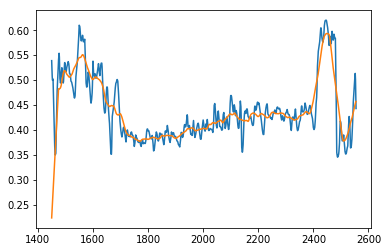

In [43]:
plt.plot(w_train[w_train.well_ID == idx_test_well]["NPHI"])
plt.plot(w_train[w_train.well_ID == idx_test_well]["s_NPHI"])

In [44]:
w_test["s_NPHI"] = smooth(w_test["NPHI"].values, box_len=50)
X_test = w_test[['Depth','GR','ILD','NPHI','s_NPHI']].as_matrix()

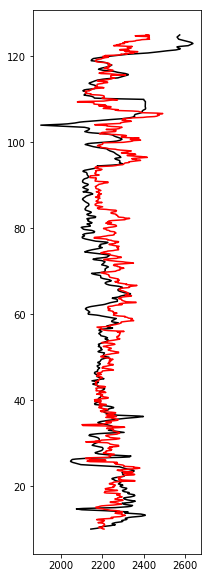

In [45]:
# s_NPHI will be the smoothed array!
X = w_train[['Depth','GR','ILD','NPHI','s_NPHI']].as_matrix()

#!--
est = GradientBoostingRegressor(n_estimators=100, learning_rate=0.05,
    max_depth=5, random_state=0, loss='ls')

est.fit(X, y)

y_test_GBT = est.predict(X_test)


w_test_complete['RHOB_pred_GBT'] = y_test_GBT

my_well = w_test_complete[w_test_complete.well_ID==well_id]

plt.figure(figsize=(3,10))
plt.plot(my_well.RHOB, my_well.Depth, 'k')
plt.plot(my_well.RHOB_pred_GBT, my_well.Depth,'r')
#--!

In [46]:
print(mean_squared_error(my_well.RHOB, my_well.RHOB_pred_GBT)) 

8305.108866119877


In [47]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(my_well.RHOB, my_well.RHOB_pred_GBT))  

8305.108866119877


<hr />

<p style="color:gray">©2017 Agile Geoscience. Licensed CC-BY.</p>